In [39]:
# Import libary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# Read data

data = pd.read_csv("data/BTC-Daily.csv")

data.drop_duplicates()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [41]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 to 2022-03-01


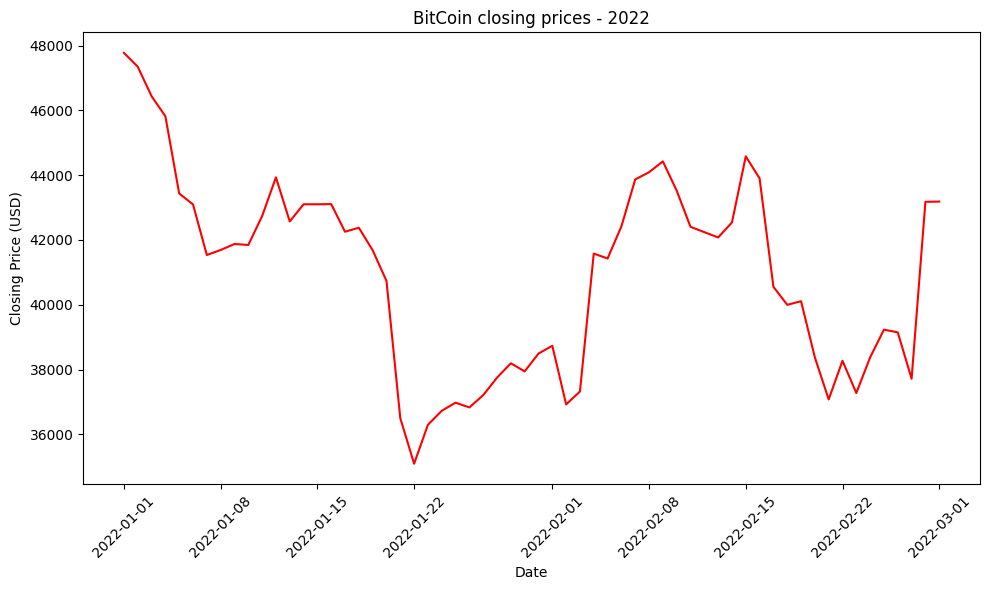

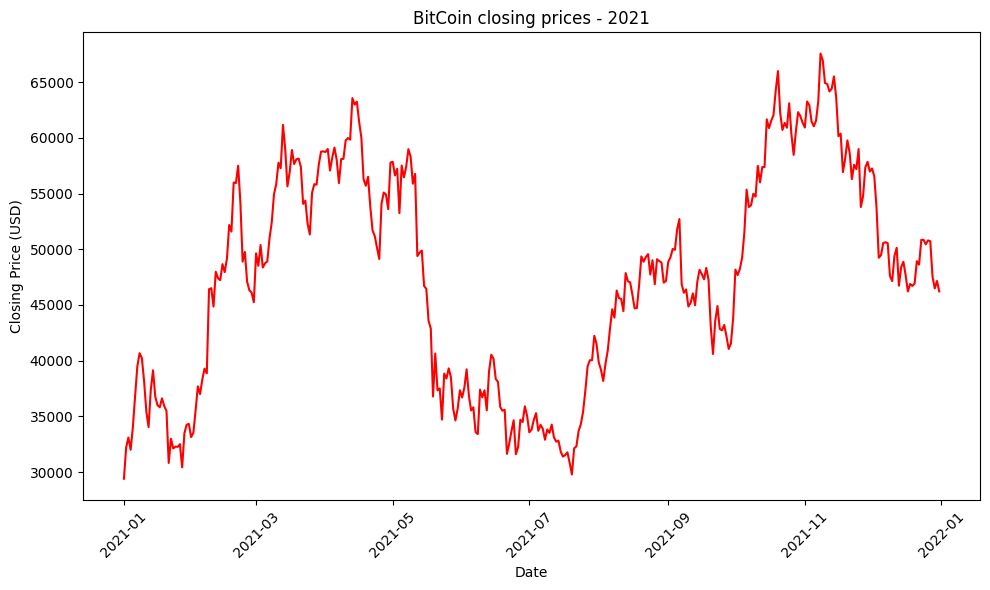

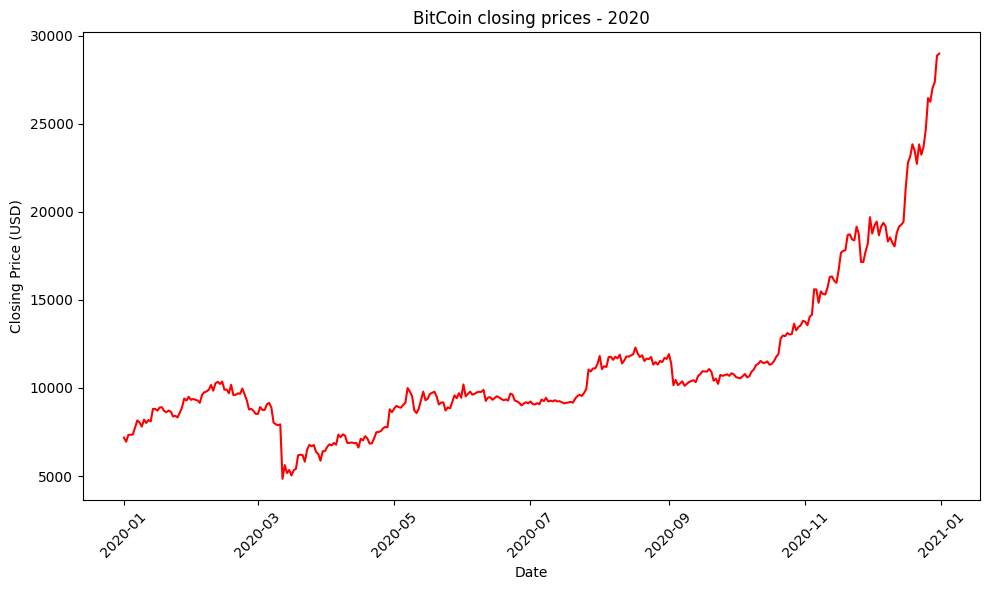

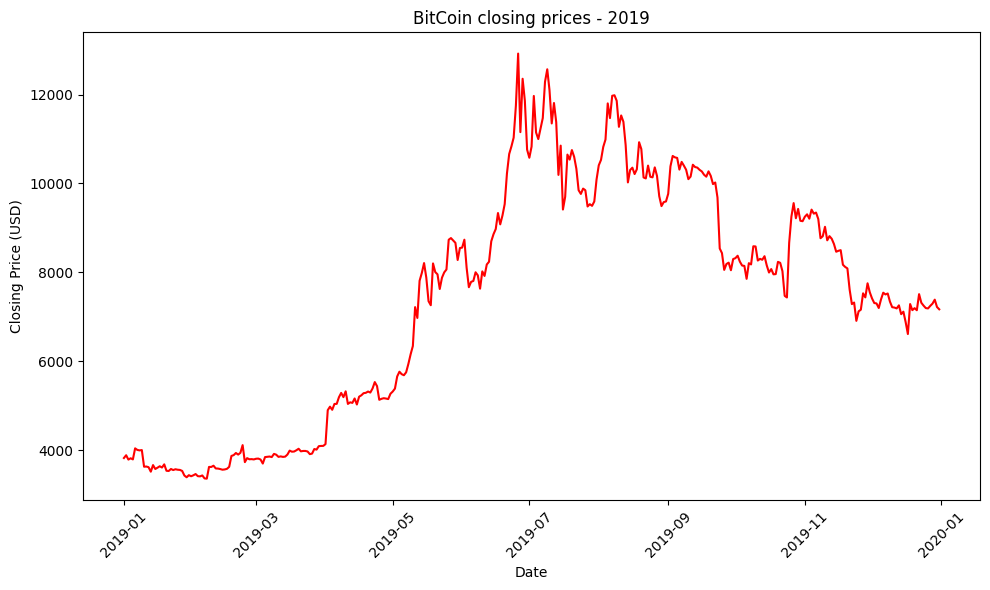

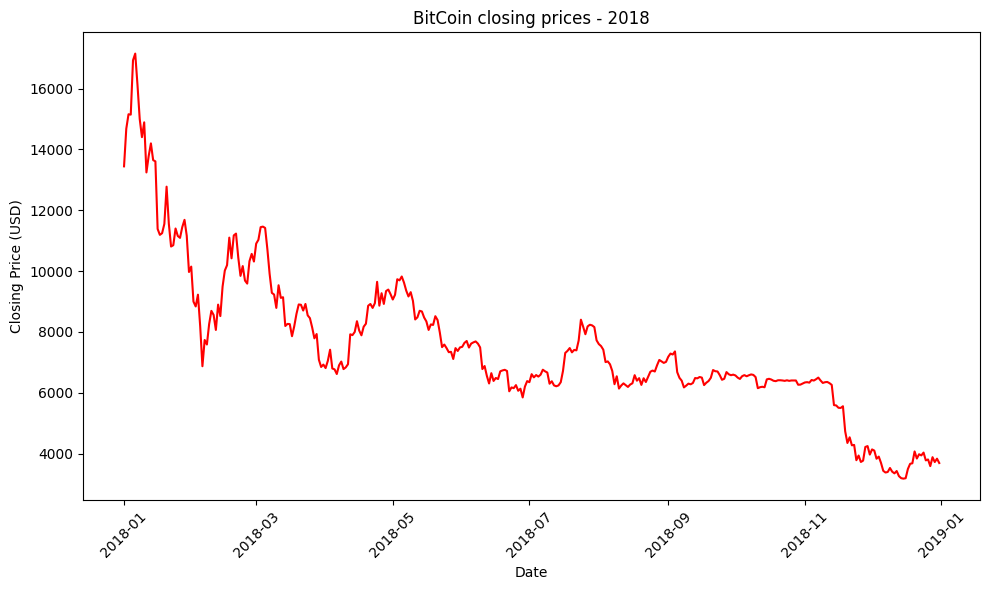

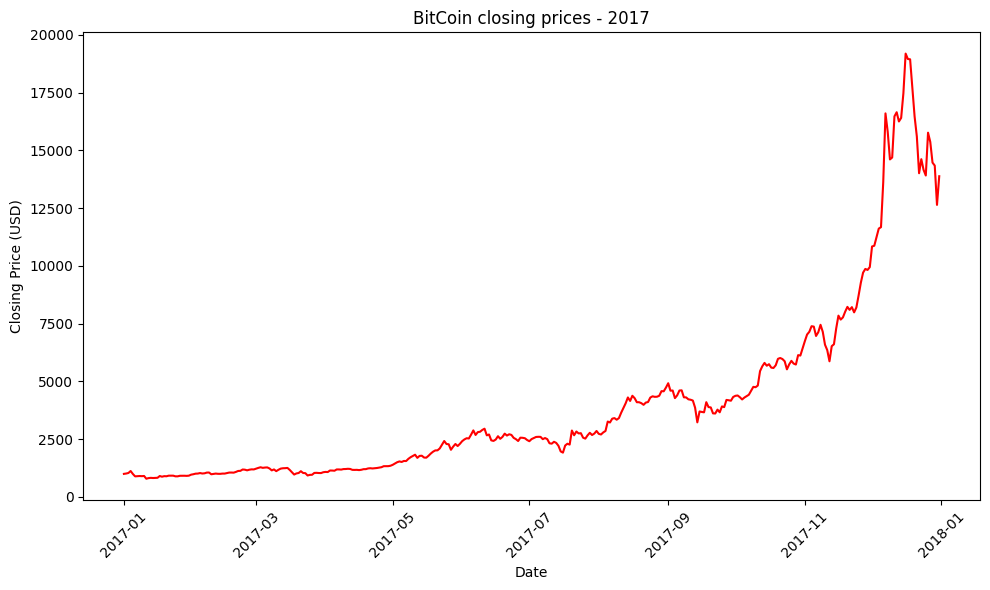

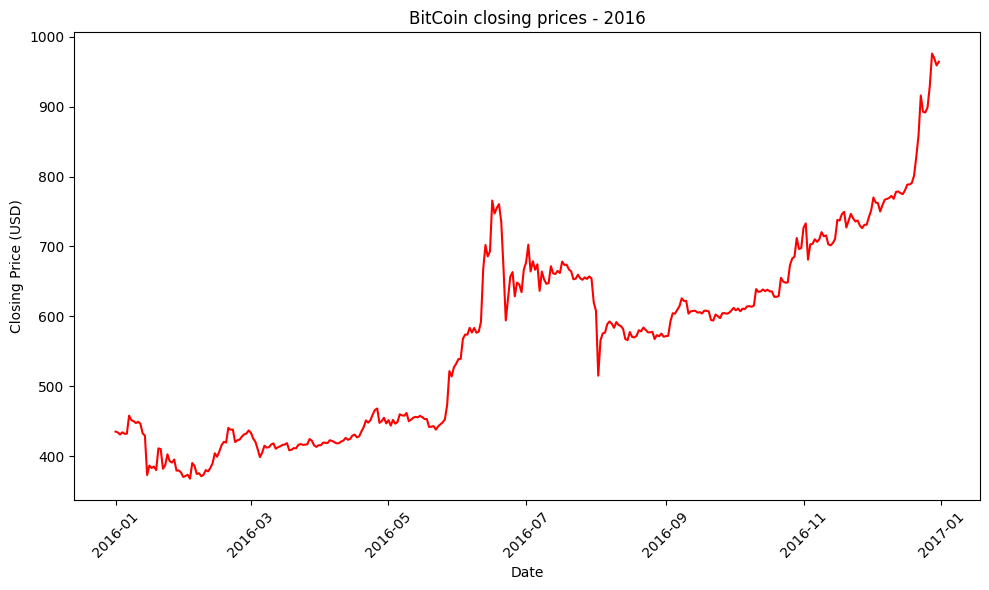

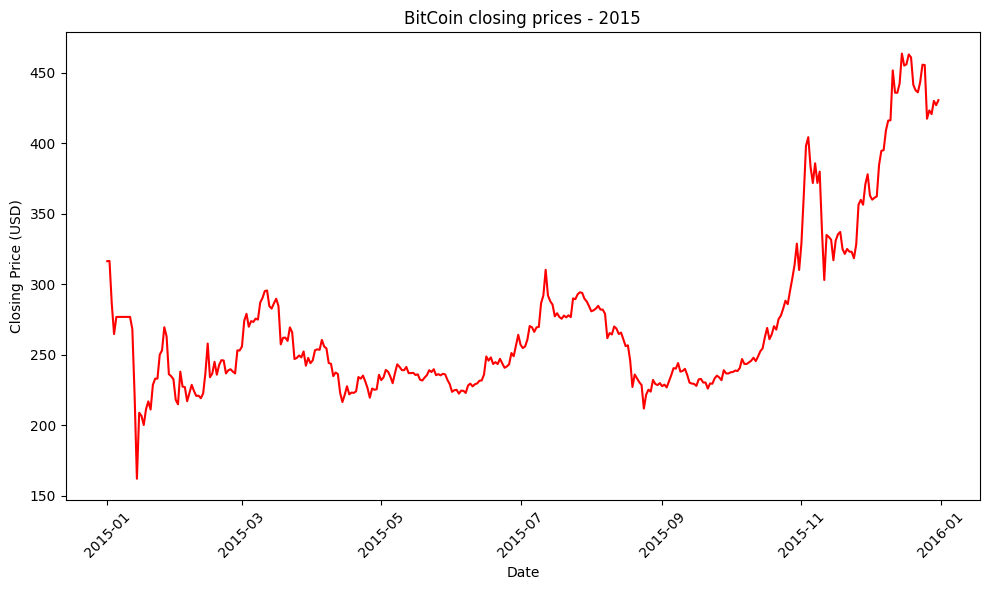

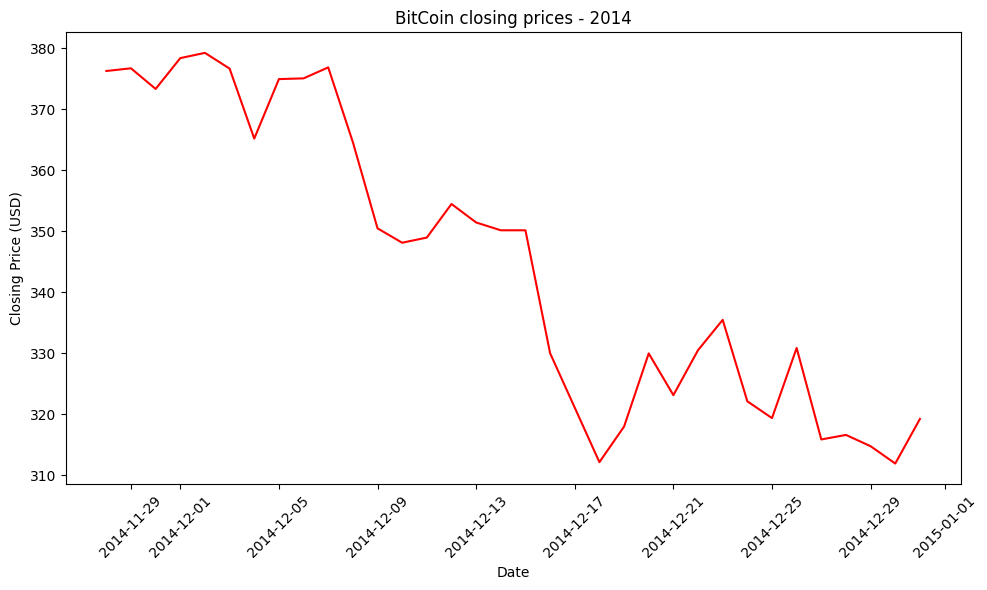

In [42]:
data["date"] = pd.to_datetime(data["date"])
date_range = str(data["date"].dt.date.min()) + " to " + str(data["date"].dt.date.max())
print(date_range)

data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day

unique_year = data["year"].unique()

for year in unique_year:
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date' : dates})
    year_month_day["year"] = year_month_day["date"].dt.year
    year_month_day["month"] = year_month_day["date"].dt.month
    year_month_day["day"] = year_month_day["date"].dt.day

    merged_data = pd.merge(year_month_day, data, on=["year", "month", "day"], how="left")

    plt.figure(figsize=(10, 6))
    plt.plot(merged_data["date_x"], merged_data["close"], color='r')
    plt.title(f"BitCoin closing prices - {year}")
    plt.ylabel(f"Closing Price (USD)")
    plt.xlabel(f"Date")
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


**Biểu đồ nến giá giao dịch từ năm 2019 - 2022**

/var/folders/4s/pgn0zhf956z_0dv7v49kg1bw0000gn/T/ipykernel_31226/3818441870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fillter["date"] = data_fillter['date'].map(mdates.date2num)


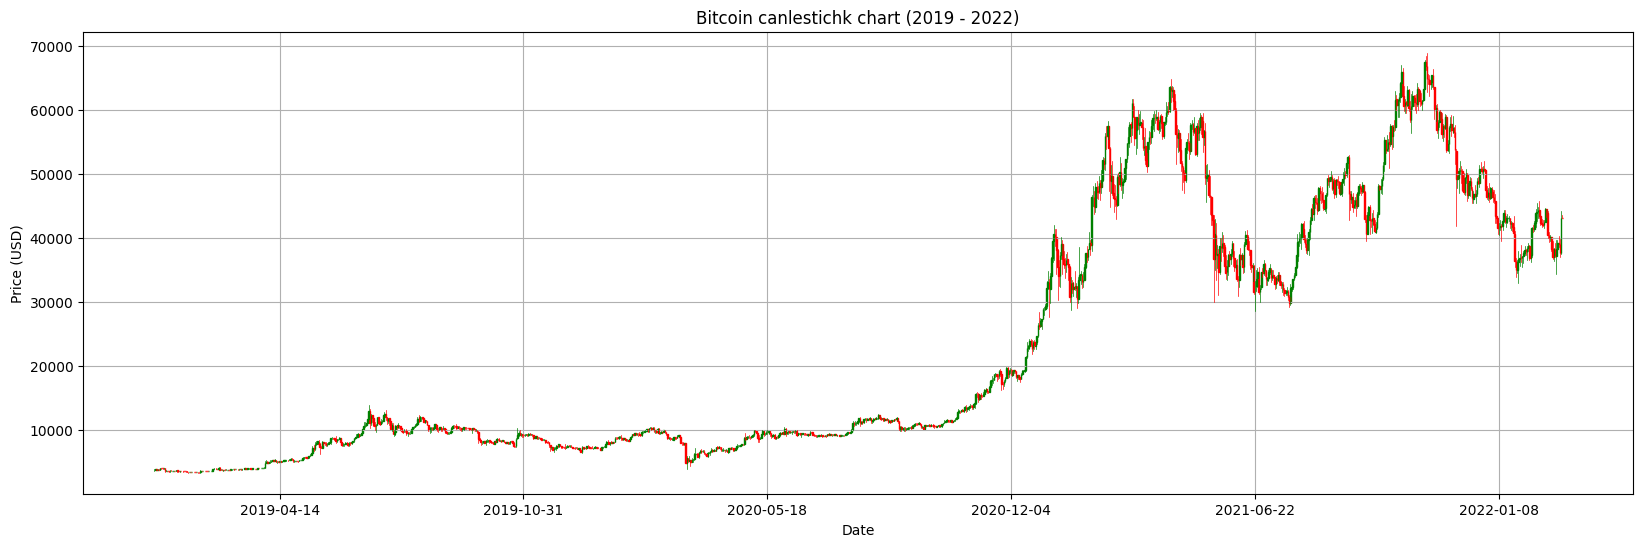

In [43]:
import matplotlib.dates as mdates
import datetime
from mplfinance.original_flavor import candlestick_ohlc

data_fillter = data[(data['date'] >= '2019-01-01') & (data['date'] <= '2022-12-31')]

data_fillter["date"] = data_fillter['date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, data_fillter[["date", "open", "high", "low", "close"]].values, 
                width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title("Bitcoin canlestichk chart (2019 - 2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

plt.savefig("bitcoin_candlestick_2019_2022.pdf")
plt.show()

**Chuẩn hoá dữ liệu và chia tập train và test**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data["scaler_open"] = scaler.fit_transform(data["open"].values.reshape(-1, 1))
data["scaler_high"] = scaler.fit_transform(data["high"].values.reshape(-1, 1))
data["scaler_low"] = scaler.fit_transform(data["low"].values.reshape(-1, 1))
data["scaler_close"] = scaler.fit_transform(data["close"].values.reshape(-1, 1))

X = data[["scaler_open", "scaler_high", "scaler_low"]]
y = data["scaler_close"]
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    shuffle=True)




In [45]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw,db, cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  _, n_features = X.shape
  w = np.zeros(n_features)  
  b = 0  
  losses = []

  for _ in range(num_iterations):
    y_hat = predict(X, w, b) 
    dw, db, cost = gradient(y_hat, y, X)  
    w, b = update_weight(w, b, learning_rate, dw, db) 
    losses.append(cost)


  return w, b, losses



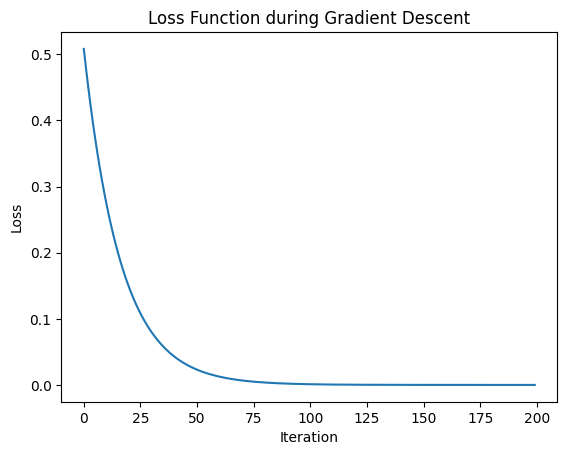

In [50]:
w, b, losses = linear_regression_vectorized(x_train.values, y_train.values, 0.01, 200)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

In [52]:
from sklearn.metrics import r2_score

y_pred = predict(x_test, w, b)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

mae = np.mean(np.abs(y_pred - y_test))

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

y_train_pred = predict(x_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


/var/folders/4s/pgn0zhf956z_0dv7v49kg1bw0000gn/T/ipykernel_31226/1663713711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


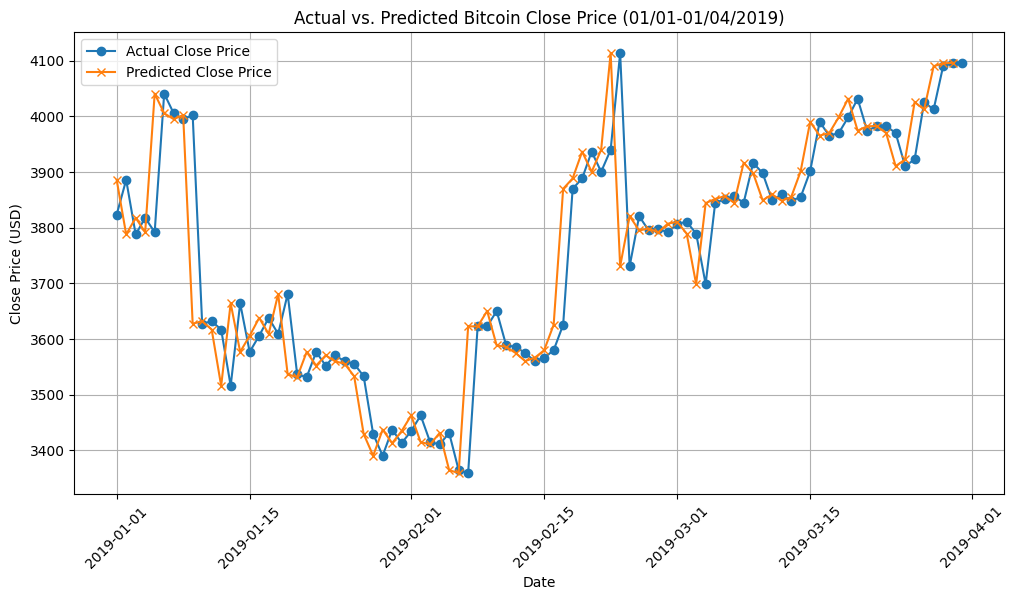

In [54]:
df_2019_Q1 = data[(data['date'] >= '2019-01-01') & (data['date'] <= '2019-03-31')]

df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
